Compute and plot interpolation polynomials to $$ \frac{1}{x^2+1}$$ on the interval [−5,5], for n ∈ {10,20,40}. Choose uniformly distributed points, and Chebyshev points on [−5,5]: 
$x_i= 5 cos\frac{(i+0.5)\pi}{n+1}$ for $i= 0,...,n$.

Plot the Lagrange interpolation polynomials $l_i$ for both choices of points.
Investigate numerically 
$$ max_{i∈\{0,...,n\}}  max_{x∈[−5,5]}|li(x)|$$ and $$max_{x∈[−5,5]} \sum_{i=0}^n |li(x)|$$ depending on n.

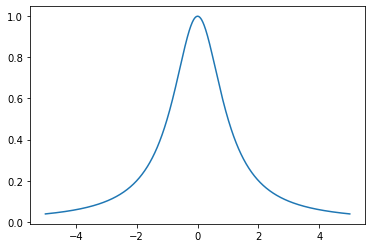

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x_interval = (-5, 5)
x_vector = np.linspace(x_interval[0], x_interval[1], 1000)

y_fun = 1/(x_vector**2+1)
plt.figure()
plt.plot(x_vector, y_fun)

In [28]:
def Lagrange (pts, i, x):
    prod = 1
    for j in range(len(pts)):
        if j != i:
            prod = prod * (x-pts[j])/(pts[i]-pts[j])
    return prod


def InterpolationPolynomial (fun, pts, x):
    sum = 0
    for i in range(len(pts)):
        sum = sum + fun(pts[i]) * Lagrange(pts, i, x)
    return sum
    

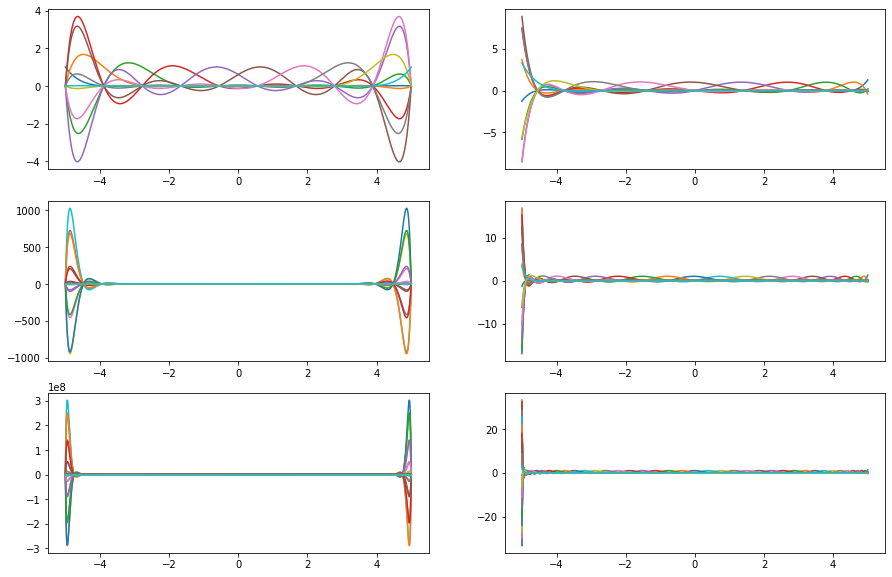

In [29]:
n_list = (10, 20, 40)

fig, axes = plt.subplots(3, 2, figsize = (15, 10))

for n_idx, n in enumerate(n_list):   
    i = np.arange(n)
    
    li_uniform_array = np.empty((len(x_vector, len(i))))
    li_uniform_array[:] = np.nan
    li_chebyshev_array = np.empty((len(x_vector, len(i))))
    li_chebyshev_array[:] = np.nan
    
    uniform_nodes = np.linspace(x_interval[0], x_interval[1], n)
    chebyshev_nodes = 5*np.cos(np.pi * (i+0.5)/(n+1))
        
    for current_i in i:
        li_uniform = Lagrange(uniform_nodes, current_i, x_vector)
        li_chebyshev = Lagrange(chebyshev_nodes, current_i, x_vector)
        
        li_uniform_array[:, i] = 
        
        axes[n_idx][0].plot(x_vector, li_uniform)
        axes[n_idx][1].plot(x_vector, li_chebyshev)
        

In [14]:
print(x_vector[-1])

5.0


In [22]:
print(np.arange(3))

[0 1 2]
